# Demo: Usando la clase Pagina Web del paquete bccr

**Randall Romero Aguilar**

- Primera versión: 21 de diciembre de 2019
- Esta actualización: 25 de abril de 2021.

----------

Este cuaderno de Jupyter ilustra el uso de la clase `PaginaWeb` del paquete de Python `bccr`, con el cual se facilita la descarga de datos del sitio https://www.bccr.fi.cr/indicadores-economicos del Banco Central de Costa Rica. La documentación completa de la clase está en https://randall-romero.github.io/bccr/pagina.html.

Se asume que el se tiene instalada la versión 2021.05.1 del paquete o una más reciente.

Este primer bloque instala el paquete si está corriendo este cuaderno de Jupyter en Google Colab.

In [1]:
if 'google.colab' in str(get_ipython()):
    print("Este cuaderno está corriendo en Google Colab. Es necesario instalar el paquete bccr para obtener los datos")
    !pip install bccr
else:
    print("Este cuaderno está corriendo localmente.")

Este cuaderno está corriendo localmente.


### Pasos preliminares

Primero cargamos algunos paquetes: `bccr` para consultar datos del servicio web, `pandas` para manipular los datos en Python, `numpy` para calcular un promedio (más adelante), `matplotlib` para hacer gráficos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

## 1. Iniciando una consulta

Se import desde `PW` desde `bccr`. Este es un objeto de la clase `PaginaWeb`.

In [2]:
from bccr import PW

Similar a la descarga de datos con el Servicio Web, para descargar cuadros del sitio de internet del BCCR no es necesario inscribirse en la página de servicio web en https://www.bccr.fi.cr/indicadores-economicos/servicio-web. No obstante, dado que actualmente este paquete de Python sólo da soporte a un subconjunto de los cuadros publicados (452 soportados de los más de 550 publicados), se recomienda que para aquellos cuadros que no se pueden aún descargar se descarguen los indicadores con la clase `bccr.ServicioWeb`.

## 2. Buscando una serie

Para descargar los datos de un cuadro del sitio web, es necesario saber su número de cuadro (este número en general no coincide con los códigos de variables del servicio web). Si ya ha abierto el cuadro en un navegador de Internet, la forma más sencilla de averiguar su número es ver la dirección URL, tal como se ilustra en la siguiente figura:
![formulario](cuadro-pagina-web.PNG)

En la parte resaltada con un círculo rojo podemos observar que para el cuadro de "Medio Circulante", el número de cuadro es el 125.

Para facilitar encontrar las series sin necesidad de navegar por el sitio web, la clase `bccr.PaginaWeb` provee la función `buscar`. Acá, por ejemplo, buscamos la *frase* `'medio circulante'`:

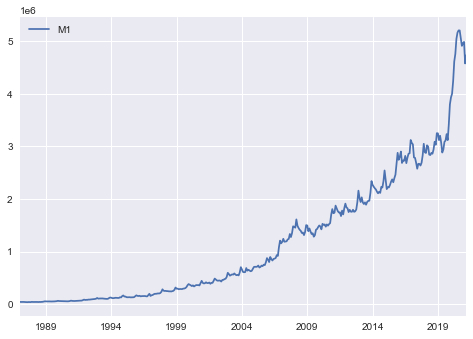

In [3]:
PW(M1=125).plot();

In [4]:
PW.buscar(frase='medio circulante')

,title,subtitle,freq
chart,,,
125,Medio circulante (M1) medido a nivel del sistema bancario,- Saldos a fin de mes en millones de colones -,M
164,Medio circulante (M1) medido a nivel del sistema financiero,-Saldos a fin de mes en millones de colones-,M


El resultado nos indica que los cuadros 125 y 164 corresponden a series que incluyen la *frase* **exacta** "medio circulante" en su descripción (una se refiere al sistema bancario y la otra al financiero). Si no sabemos la frase exacta pero sí varias palabras que deben aparecer en la descripción (en cualquier orden), usamos `buscar` con la opción `todos`

In [5]:
PW.buscar(todos='numerario poder público')

,title,subtitle,freq
chart,,,
54,Numerario en poder del público,Medido a nivel de sistema bancario --- -Saldos a fin de mes en millones de colones-,M
177,Numerario en poder del público,Medido a nivel del sistema financiero --- -Saldos a fin de mes en millones de colones-,M


También tenemos la opción de buscar series donde solo `algunos` de los términos aparecen en la descrición. Podemos además filtrar los resultados por la frecuencia de los datos (`A` anual, `6M` semestral, `Q` trimestral, `M` mensual, `W` semanal, y `D`diaria.

In [6]:
PW.buscar(algunos='japón yen', frecuencia='D')

,title,subtitle,freq
chart,,,
357,Yen Japonés,Con respecto al Dólar Estadounidense,D


Si quisiéramos ver este último cuadro en el sitio de Internet del BCCR, simplemente usamos la funcion`.web`:

In [7]:
PW.web(357)

Al ejecutar esta línea, se abre una nueva pestaña en su navegador de Internet predefinido con el cuadro solicitado. Esto resulta útil para verificar que los datos que descargamos en realidad coinciden con lo que esperábamos.

## 2. Descargando datos
### 2.1 Descargando una serie

Supongamos que queremos descargar datos del medio circulante (sistema bancario nacional). Arriba encontramos que su código es el 125. Para ello ejecutamos `PW` directamente:

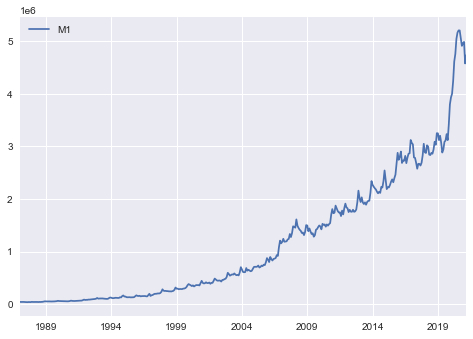

In [8]:
datos = PW(M1=125)
datos.plot();

En la celda anterior, la parte `M1=` es opcional, la utilizamos acá para cambiar el nombre de la serie. Si omitimos esa parte, las series se nombrar a partir de su descripción en la base de datos:

In [9]:
PW(125).tail()

,Medio circulante (M1) medido a nivel del sistema bancario
2020-11,4.913216e+06
2020-12,4.964104e+06
2021-01,4.988481e+06
2021-02,4.578601e+06
2021-03,4.733563e+06


### 2.2 Descargando dos series de la misma frecuencia
Es posible además pasarle varios códigos a `datos` de una vez. Acá descargamos, además del medio circulante, en numerario en poder del público. El resultado será una tabla `pandas.DataFrame`, donde cada columna corresponde a una variable.

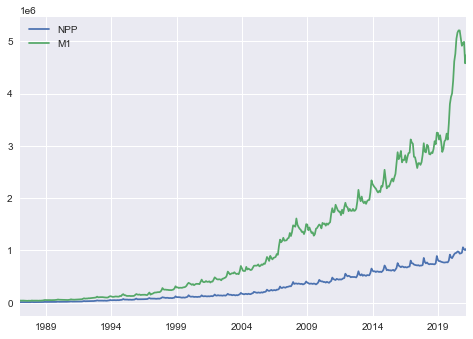

In [10]:
dinero = PW(NPP=54, M1=125)
dinero.plot();

### 2.3 Cambiando la frecuencia de los datos

La función `buscar` ofrece la opción de cambiar la frecuencia de los datos, pero se recomienda tener precaución al utilizarla. Para ilustrar el motivo, suponga que deseamos construir una serie mensual del tipo de cambio promedio de MONEX. Primero buscamos un número de cuadro

In [11]:
PW.buscar('tipo cambio monex', frecuencia='D')

,title,subtitle,freq
chart,,,
748,Tipo de cambio promedio MONEX,En colones costarricenses,D


Encontramos el 748. Cuando lo descargamos, indicamos que queremos una serie mensual `freq='M'`, promediando `func='mean'` los datos diarios. Para ver los últimos 9 datos usamos `.tail(9)`

In [12]:
PW(748, freq='M',func='mean').tail(9)

,Tipo de cambio promedio MONEX
2020-08,384.186774
2020-09,420.295667
2020-10,429.294839
2020-11,405.891333
2020-12,411.871613
2021-01,395.517742
2021-02,437.433571
2021-03,454.334839
2021-04,368.631600


Los datos se ver demasiado inferiores a su verdadero valor! Resulta que si descargamos los datos originales (es decir, sin transformarlos)

In [13]:
PW(748).tail(12)

,Tipo de cambio promedio MONEX
2021-04-14,614.05
2021-04-15,614.23
2021-04-16,614.69
2021-04-17,0.00
2021-04-18,0.00
2021-04-19,614.94
2021-04-20,615.32
2021-04-21,616.13
2021-04-22,616.49
2021-04-23,617.01


vemos que se están reportando los datos de fin de semana (cuando no opera MONEX) como cero, en lugar de como datos faltantes (Esto puede originarse en que en los datos originales en Excel se haya calculado un promedio de celdas vacías, ¡las cuales Excel simplemente interpreta como ceros!). Para solucionarlo

In [14]:
PW(748).replace(0.0, np.nan).tail(12)

,Tipo de cambio promedio MONEX
2021-04-14,614.05
2021-04-15,614.23
2021-04-16,614.69
2021-04-17,NaN
2021-04-18,NaN
2021-04-19,614.94
2021-04-20,615.32
2021-04-21,616.13
2021-04-22,616.49
2021-04-23,617.01


con lo que

In [15]:
PW(748).replace(0.0, np.nan).resample('M').mean().tail(12)

,Tipo de cambio promedio MONEX
2020-05,571.590500
2020-06,579.350909
2020-07,584.003636
2020-08,595.489500
2020-09,600.422381
2020-10,604.915455
2020-11,608.837000
2020-12,608.000952
2021-01,613.052500
2021-02,612.407000


### 2.4 Descargando varias series de distinta frecuencia

La función `datos` permite descargar variables de distinta frecuencia, convirtiéndolos a una frecuencia común. Por ejemplo, suponga que desea, además de los datos anteriores, la serie de la tasa básica pasiva:

In [16]:
PW.buscar(frase='tasa básica ')

,title,subtitle,freq
chart,,,
17,Tasa Básica Diaria,Porcentajes,D
592,Tasa Básica Mensual,Porcentajes a fin de mes,M
2110,Cálculo de la Tasa Básica Pasiva,Informe semanal,?


Vemos que el cuadro 17 tiene datos diarios y el 592 mensuales. El signo `?` en la columna `freq` del cuadro 2110 significa que bccr.PaginaWeb aún no puede descargar estos datos.

Vemos que el código 17 es de una serie diaria, mientras que los datos de `M1`y `NPP` eran mensuales. En la siguiente celda, le indicamos a `datos` que debe convertir los datos de mayor a menor frecuencia usando un promedio (`func=np.mean`). Es posible además restringir el rango de los datos con los parámetros `FechaInicio=` y `FechaFinal=`.

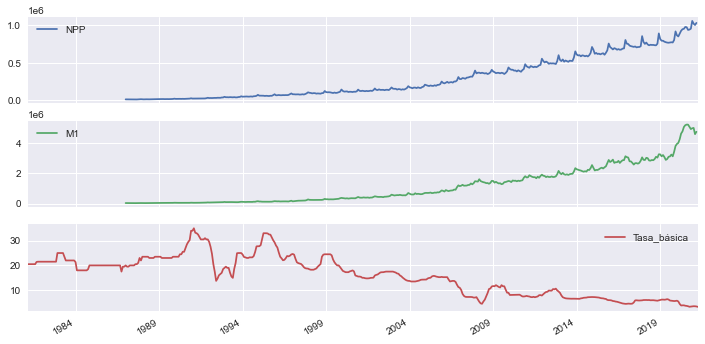

In [17]:
datos = PW(NPP=54, M1=125, Tasa_básica=17, func=np.mean)
datos.plot(subplots=True, figsize=[12,6]);

In [18]:
datos.tail()

,NPP,M1,Tasa_básica
2020-12,1.060905e+06,4.964104e+06,3.437097
2021-01,1.024351e+06,4.988481e+06,3.506452
2021-02,1.006321e+06,4.578601e+06,3.485714
2021-03,1.034342e+06,4.733563e+06,3.416129
2021-04,NaN,NaN,3.262500


Es posible además restringir el rango de los datos con los parámetros `FechaInicio=` y `FechaFinal=`, aunque en algunos casos esto puede generar un error (¡estoy aún depurando el código!). Por ejemplo, para restringir una búsqueda al rango marzo 2016 a julio de 2018:

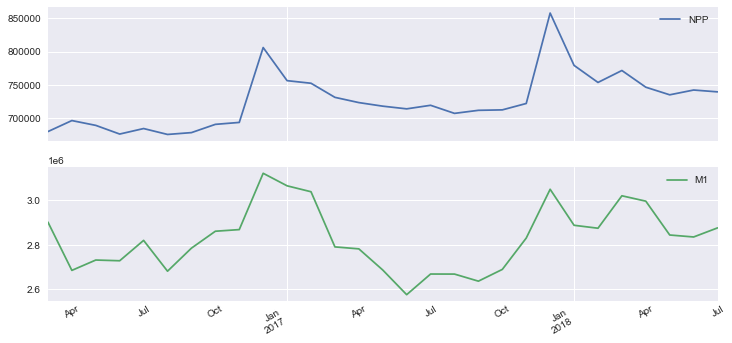

In [19]:
PW(NPP=54, M1=125, FechaInicio='2016m3', FechaFinal='2018m7').plot(subplots=True, figsize=[12,6]);

## 3. Exportando datos

Finalmente, podemos exportar los datos de `pandas` a otros formatos; aquí se muestran los comandos para obtener archivos CSV (`to_csv`), Excel (`to_excel`) y Latex (`to_latex`):

In [20]:
datos.to_csv  ('datos.csv')
datos.to_excel('datos.xlsx')
datos.to_latex('datos.tex')

También podemos exportarlos a Stata (`to_stata`), aunque primero es necesario hacer un par de ajustes (indexar los datos por fechas en vez de períodos y quitar espacios y usar solo caracteres ASCII en los nombres de las columnas)

In [21]:
datos.index = datos.index.to_timestamp()
datos.rename(columns={'Tasa_básica':'Tasa_basica'}, inplace=True)
datos.to_stata('datos.dta')

Hay más opciones disponibles. Se sugiere revisar la documentación de pandas en https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#conversion 

## Advertencia

Este paquete ha sido desarrollado por Randall Romero Aguilar, y se ha compartido para facilitar la obtención de datos del BCCR a quien así lo necesite.
**NO** es un paquete oficial del Banco Central de Costa Rica, ni cuenta con aprobación o patrocinio del BCCR.

**El paquete se ofrece gratuitamente pero SIN NINGUNA GARANTIA acerca de su correcto funcionamiento.**Aunque he puesto el mayor esfuerzo en que este paquete funcione correctamente, algunos errores pueden persistir.  Si encuentra alguno, o bien si tiene sugerencias acerca de futuras mejoras, por favor envíeme un correo a randall.romero@outlook.com.

&#169; Randall Romero Aguilar, 2015-2021